This dataset from physionet.org contains gait dynamics, summarized as the right stride interval, for subjects with amyotrophic lateral sclerosis (ALS), as well as a control group, and as well as subjects with Parkinson's disease and Huntingtons disease. The underlying mechanisms affecting gait dynamics for Parkinson's and Huntington's disease are different from that of ALS, however gait is affected vs. that of a control group.

https://physionet.org/content/gaitndd/1.0.0/

# Import Libraries and Data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('/kaggle/input/als-gait-dynamics/gait.csv')

# Exploratory Data Analysis

In [75]:
print(np.shape(df))

(14922, 5)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14922 entries, 0 to 14921
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject                      14922 non-null  object 
 1   Time Point                   14922 non-null  int64  
 2   Elapsed Time (sec)           14922 non-null  float64
 3   Right Stride Interval (sec)  14922 non-null  float64
 4   Group                        14922 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 583.0+ KB


In [77]:
df.head()

,Subject,Time Point,Elapsed Time (sec),Right Stride Interval (sec),Group
0,ALS1,1,22.3200,1.3533,ALS
1,ALS1,2,23.6433,1.2667,ALS
2,ALS1,3,24.9467,1.3600,ALS
3,ALS1,4,26.3633,1.2833,ALS
4,ALS1,5,27.6000,1.4067,ALS


In [78]:
df['Group'].unique()

array(['ALS', 'CTR', 'PAR', 'HUN'], dtype=object)

In [79]:
df['Subject'].unique()

array(['ALS1', 'ALS2', 'ALS3', 'ALS4', 'ALS5', 'ALS6', 'ALS7', 'ALS8',
       'ALS9', 'ALS10', 'ALS11', 'ALS12', 'ALS13', 'CTRL1', 'CTRL2',
       'CTRL3', 'CTRL4', 'CTRL5', 'CTRL6', 'CTRL7', 'CTRL8', 'CTRL9',
       'CTRL10', 'CTRL11', 'CTRL12', 'CTRL13', 'CTRL14', 'CTRL15',
       'CTRL16', 'PARK1', 'PARK2', 'PARK3', 'PARK4', 'PARK5', 'PARK6',
       'PARK7', 'PARK8', 'PARK9', 'PARK10', 'PARK11', 'PARK12', 'PARK13',
       'PARK14', 'PARK15', 'HUNT1', 'HUNT2', 'HUNT3', 'HUNT4', 'HUNT5',
       'HUNT6', 'HUNT7', 'HUNT8', 'HUNT9', 'HUNT10', 'HUNT11', 'HUNT12',
       'HUNT13', 'HUNT14', 'HUNT15', 'HUNT16', 'HUNT17', 'HUNT18',
       'HUNT19'], dtype=object)

In [80]:
class_counts = df.groupby('Subject').size()
print(class_counts.describe())

count     63.000000
mean     236.857143
std       35.641973
min      122.000000
25%      222.000000
50%      245.000000
75%      260.500000
max      310.000000
dtype: float64


In [81]:
crosstab = df.pivot_table(values = 'Right Stride Interval (sec)', columns = "Subject", index = "Time Point")
print(np.shape(crosstab))
crosstab.head()

(310, 63)


Subject,ALS1,ALS10,ALS11,ALS12,ALS13,ALS2,ALS3,ALS4,ALS5,ALS6,...,PARK14,PARK15,PARK2,PARK3,PARK4,PARK5,PARK6,PARK7,PARK8,PARK9
Time Point,,,,,,,,,,,,,,,,,,,,,
1,1.3533,1.1300,1.1500,1.3000,1.4633,1.1467,1.1833,1.7733,1.2600,1.5067,...,1.5400,1.2067,1.0067,1.1300,1.3600,1.1233,1.0467,1.1733,1.2833,1.2800
2,1.2667,1.0967,1.1600,1.3333,1.5367,1.1933,1.1633,2.4400,1.2733,1.7167,...,1.4767,1.1800,0.9767,1.1767,1.3400,1.0800,1.0567,1.1267,1.5567,1.3200
3,1.3600,1.0933,1.1933,1.3667,1.4200,1.1567,1.1233,1.3333,1.2667,1.6033,...,1.5367,1.1400,0.9700,1.1867,1.3600,1.0767,1.0600,1.1000,1.1467,1.2900
4,1.2833,1.1000,1.2400,1.3533,1.4133,1.1067,1.2500,1.5100,1.2267,1.5733,...,1.5367,1.1900,0.9733,1.2000,1.5000,1.0600,1.0533,1.0733,1.4133,1.2567
5,1.4067,1.1133,1.1567,1.3133,1.4700,1.1400,1.1800,1.5333,1.2700,1.7267,...,2.8833,1.1467,0.9833,1.1667,1.4567,1.0167,1.0400,1.1233,1.3133,1.2767


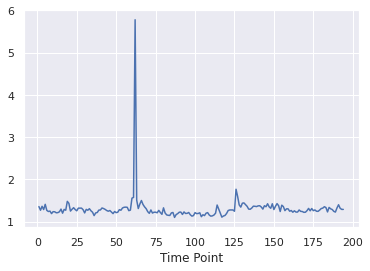

In [82]:
crosstab['ALS1'].plot();

In [83]:
series = 'Right Stride Interval (sec)'

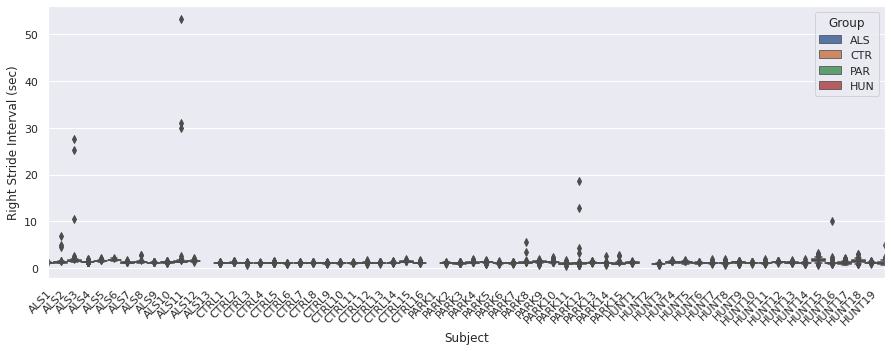

In [84]:
plt.figure(figsize=(15, 5))
chart = sns.boxplot(x=df['Subject'], y=df[series], hue=df['Group'], width=4)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Removing Outliers

In [85]:
df_copy = df[df[series] < 3]
crosstab = df_copy.pivot_table(values = 'Right Stride Interval (sec)', columns = "Subject", index = "Time Point")
print(np.shape(crosstab))
crosstab.head()

(310, 63)


Subject,ALS1,ALS10,ALS11,ALS12,ALS13,ALS2,ALS3,ALS4,ALS5,ALS6,...,PARK14,PARK15,PARK2,PARK3,PARK4,PARK5,PARK6,PARK7,PARK8,PARK9
Time Point,,,,,,,,,,,,,,,,,,,,,
1,1.3533,1.1300,1.1500,1.3000,1.4633,1.1467,1.1833,1.7733,1.2600,1.5067,...,1.5400,1.2067,1.0067,1.1300,1.3600,1.1233,1.0467,1.1733,1.2833,1.2800
2,1.2667,1.0967,1.1600,1.3333,1.5367,1.1933,1.1633,2.4400,1.2733,1.7167,...,1.4767,1.1800,0.9767,1.1767,1.3400,1.0800,1.0567,1.1267,1.5567,1.3200
3,1.3600,1.0933,1.1933,1.3667,1.4200,1.1567,1.1233,1.3333,1.2667,1.6033,...,1.5367,1.1400,0.9700,1.1867,1.3600,1.0767,1.0600,1.1000,1.1467,1.2900
4,1.2833,1.1000,1.2400,1.3533,1.4133,1.1067,1.2500,1.5100,1.2267,1.5733,...,1.5367,1.1900,0.9733,1.2000,1.5000,1.0600,1.0533,1.0733,1.4133,1.2567
5,1.4067,1.1133,1.1567,1.3133,1.4700,1.1400,1.1800,1.5333,1.2700,1.7267,...,2.8833,1.1467,0.9833,1.1667,1.4567,1.0167,1.0400,1.1233,1.3133,1.2767


In [86]:
for col in crosstab.columns:
    if col != 'Time Point':
        med = np.median(crosstab[col].dropna())
        for i in range(0,len(crosstab[col])):
            value = crosstab[col].iloc[i]
            if value == 0 or value > 3:
                crosstab[col].iloc[i] = med

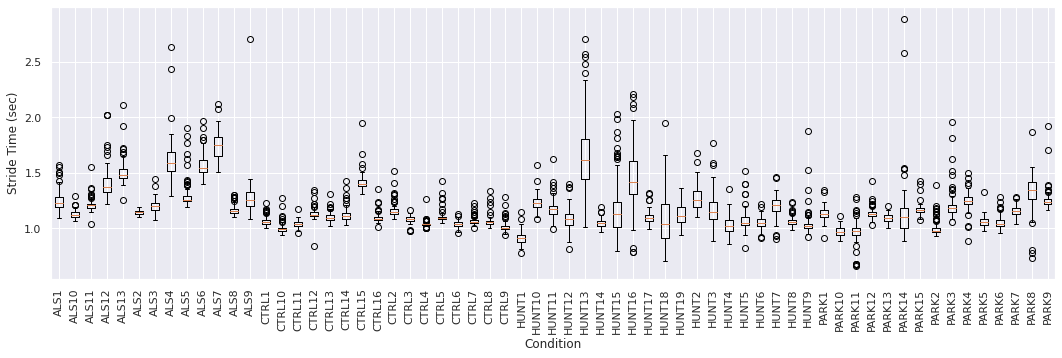

In [87]:
labels = [i for i in crosstab.columns]
plt.figure(figsize=(18,5))
ax = plt.gca()
ax.set_xticklabels(labels=labels,rotation=90);
plt.xlabel('Condition')
plt.ylabel('Stride Time (sec)')
plt.boxplot(crosstab.dropna(), labels=labels);

In [88]:
als_df = df_copy[df_copy['Group'] == 'ALS']
ctrl_df = df_copy[df_copy['Group'] == 'CTR']
park_df = df_copy[df_copy['Group'] == 'PAR']
hunt_df = df_copy[df_copy['Group'] == 'HUN']

In [89]:
def plot_ts(db):
    subjects = db['Subject'].unique()
    fig = plt.figure(figsize=(15,7))
    for i in range(len(subjects)):
        subj = subjects[i]
        data = db[db['Subject'] == subj]
        x = np.linspace(0,1,len(data))
        plt.plot(x,data[series]+i*.5,linewidth=2)
    plt.title('Blood Pressure Over Course of 2 Minutes')
    plt.xlabel('Time')
    plt.ylabel('Subject')
    plt.yticks([])
    plt.show()

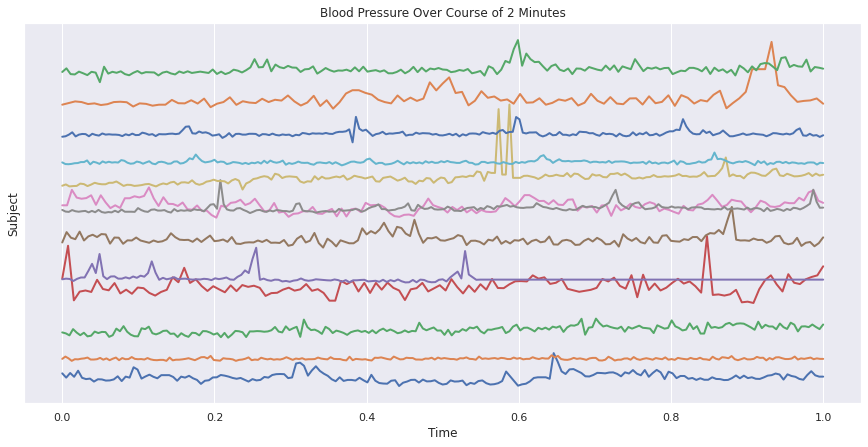

In [90]:
plot_ts(als_df)

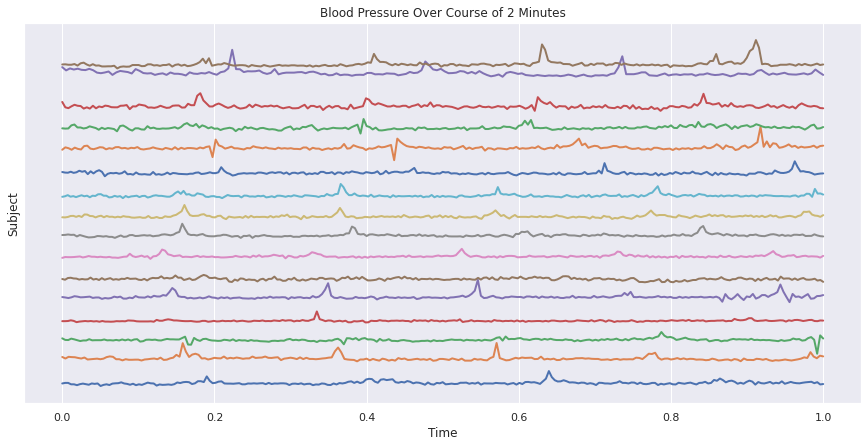

In [91]:
plot_ts(ctrl_df)

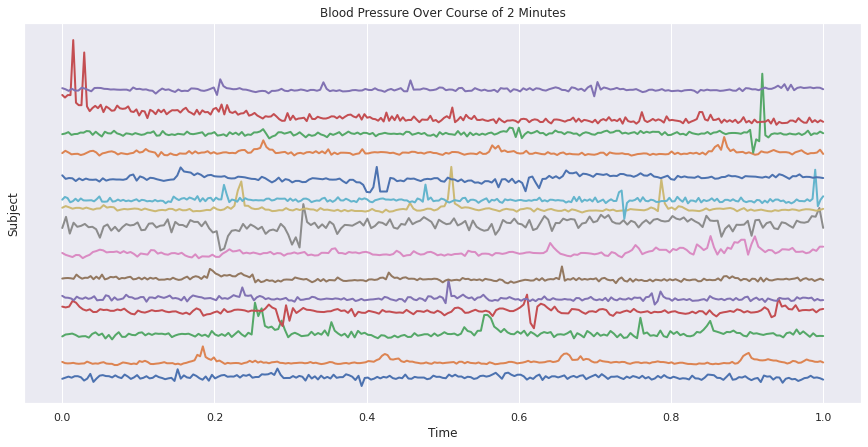

In [92]:
plot_ts(park_df)

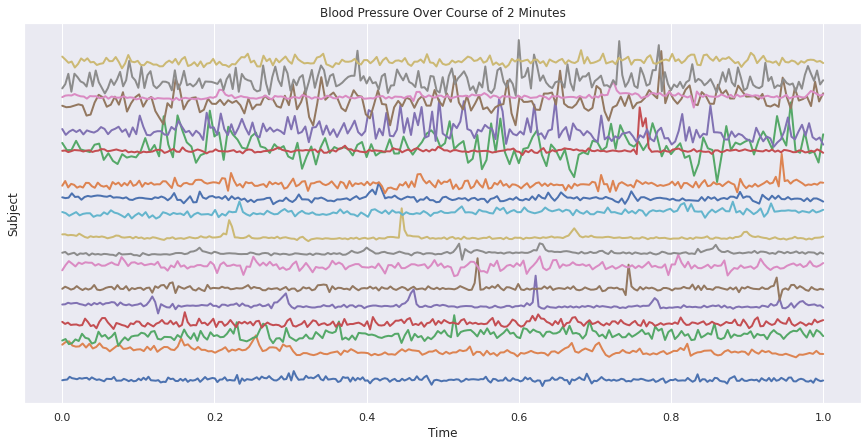

In [93]:
plot_ts(hunt_df)

In [94]:
def compile_data(db):
    results = []
    for subj in db['Subject'].unique():
        temp_df = db[db['Subject'] == subj]
        mean = np.mean(temp_df[series])
        results.append(mean)
    return results

In [95]:
als_results = compile_data(als_df)
ctrl_results = compile_data(ctrl_df)
park_results = compile_data(park_df)
hunt_results = compile_data(hunt_df)

In [96]:
results_df = pd.DataFrame()
results_df['padding'] = np.zeros(19)
results_df['als_results'] = pd.Series(als_results)
results_df['hun_results'] = pd.Series(hunt_results)
results_df['par_results'] = pd.Series(park_results)
results_df['ctr_results'] = pd.Series(ctrl_results)
results_df = results_df.drop(columns="padding")

In [97]:
results_df

,als_results,hun_results,par_results,ctr_results
0,1.275334,0.899895,1.133903,1.072380
1,1.149091,1.233039,1.005414,1.151397
2,1.239087,1.200604,1.208263,1.090744
3,1.619923,1.040275,1.250677,1.040787
4,1.274782,1.052485,1.057907,1.108162
5,1.574965,1.056897,1.035179,1.029731
6,1.752579,1.204399,1.188946,1.068063
7,1.195100,1.081874,1.361869,1.064802
8,1.322167,1.030382,1.252399,1.012181
9,1.133673,1.258333,0.968983,1.002359


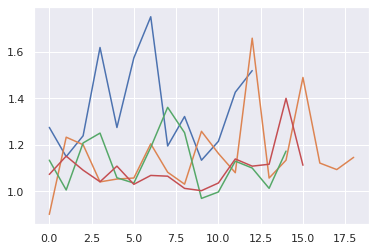

In [98]:
plt.plot(results_df)

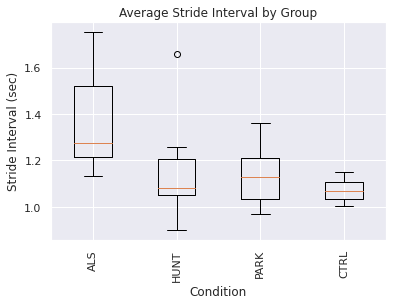

In [99]:
labels = ['ALS', 'HUNT', 'PARK', 'CTRL']
plt.figure()
plt.title('Average Stride Interval by Group')
ax = plt.gca()
ax.set_xticklabels(labels=labels,rotation=90);
plt.xlabel('Condition')
plt.ylabel('Stride Interval (sec)')
plt.boxplot(results_df.dropna(), labels=labels);

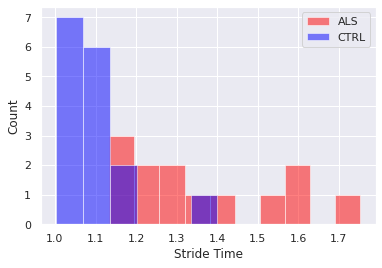

In [100]:
plt.hist(results_df['als_results'],bins=10,color=[1,0,0,.5],alpha=0.5,label='ALS')
plt.hist(results_df['ctr_results'],bins=6,color=[0,0,1,.5],alpha=0.5,label='CTRL')
plt.xlabel('Stride Time')
plt.ylabel('Count')
plt.legend()
plt.show()

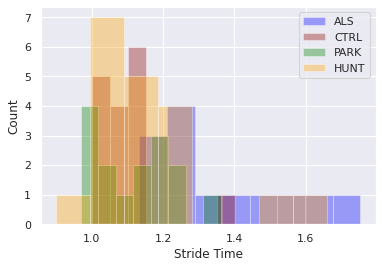

In [101]:
plt.hist(results_df['als_results'],bins=8,color='blue',alpha=0.35,label='ALS')
plt.hist(results_df['ctr_results'],bins=8,color='darkred',alpha=0.35,label='CTRL')
plt.hist(results_df['par_results'],bins=8,color='green',alpha=0.35,label='PARK')
plt.hist(results_df['hun_results'],bins=8,color='orange',alpha=0.35,label='HUNT')
plt.xlabel('Stride Time')
plt.ylabel('Count')
plt.legend()
plt.show()

In [102]:
import scipy.stats as stats

data1 = results_df['als_results'].dropna()
data2 = results_df['ctr_results'].dropna()

n1 = len(results_df['als_results'].dropna())
n2 = len(results_df['ctr_results'].dropna())

t,p = stats.ttest_ind(data1,data2,equal_var=False)

ddof = n1+n2-2
print('t(%g) = %g, p=%g'%(ddof,t,p))

t(27) = 4.43169, p=0.000407531


In [103]:
shortened_results = results_df.iloc[0:13]
shortened_results

,als_results,hun_results,par_results,ctr_results
0,1.275334,0.899895,1.133903,1.072380
1,1.149091,1.233039,1.005414,1.151397
2,1.239087,1.200604,1.208263,1.090744
3,1.619923,1.040275,1.250677,1.040787
4,1.274782,1.052485,1.057907,1.108162
5,1.574965,1.056897,1.035179,1.029731
6,1.752579,1.204399,1.188946,1.068063
7,1.195100,1.081874,1.361869,1.064802
8,1.322167,1.030382,1.252399,1.012181
9,1.133673,1.258333,0.968983,1.002359


In [104]:
new_df = pd.DataFrame()
new_df['Results'] = np.zeros(13*4)
new_df['Group'] = np.zeros(13*4)

new_df['Results'].iloc[0:13] = shortened_results['als_results']
new_df['Group'].iloc[0:13] = 'ALS'

new_df['Results'].iloc[13:26] = shortened_results['hun_results'].values
new_df['Group'].iloc[13:26] = 'HUNT'

new_df['Results'].iloc[26:39] = shortened_results['par_results'].values
new_df['Group'].iloc[26:39] = 'PARK'

new_df['Results'].iloc[39:52] = shortened_results['ctr_results'].values
new_df['Group'].iloc[39:52] = 'CTRL'

In [105]:
!pip install pingouin
import pingouin as pg

In [106]:
pg.anova(data=new_df,dv='Results',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,3,48,9.384243,0.000055,0.369688


In [107]:
pg.pairwise_tukey(data=new_df,dv='Results',between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,ALS,CTRL,1.361458,1.071012,0.290446,0.058483,4.966318,0.000052,1.886436
1,ALS,HUNT,1.361458,1.150849,0.210609,0.058483,3.601186,0.004043,1.367896
2,ALS,PARK,1.361458,1.129988,0.231470,0.058483,3.957885,0.001380,1.503387
3,CTRL,HUNT,1.071012,1.150849,-0.079837,0.058483,-1.365131,0.526980,-0.518540
4,CTRL,PARK,1.071012,1.129988,-0.058976,0.058483,-1.008433,0.745277,-0.383049
5,HUNT,PARK,1.150849,1.129988,0.020861,0.058483,0.356699,0.984259,0.135491


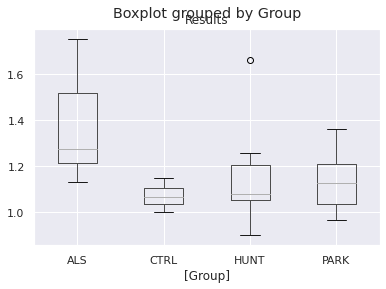

In [108]:
new_df.boxplot(by='Group');